# Short Essay Scoring
For these last session we are going to focus on scoring elementary reading comprehension exercices.

In [550]:
#First, let's import the nesseacary libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [551]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/lucas/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## 1. Import the data and print some statistics 
more information about the data set can be found in:  https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset

In [552]:
df = pd.read_csv("short_essay_scoring.csv")
print ('the data frame has a shape :', df.shape)
print ('let\'s print the first five rows \n', df.head())

the data frame has a shape : (1500, 6)
let's print the first five rows 
    Unnamed: 0                                             answer  \
0           0  Destiny would be a good friend beacu like to r...   
1           1  I think Mr.Popper would disagree because he wa...   
2           2  i think that it has made me a better person be...   
3           3  A part that I could not stop reading was when ...   
4           4       its not as good as the any of the other ones   

                                       question_text  \
0  Would you enjoy being friends with the main ch...   
1  Which character do you think would disagree wi...   
2  Do you think reading this text has made you a ...   
3  Tell us about one part of this book that total...   
4  Does this book remind you of the last book you...   

                      text_id  grade  score  
0   AUTJfAnEIe5XGTq1jvkynEr-Q      3      7  
1  BASEvlmqaEWAE9oL3mOT2KG9JQ      3      9  
2  BASEAOH8j3w9WsZOxNQ9dzAUFQ      5      8

In [553]:
print (df.info())
print (df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     1500 non-null   int64 
 1   answer         1500 non-null   object
 2   question_text  1500 non-null   object
 3   text_id        1500 non-null   object
 4   grade          1500 non-null   int64 
 5   score          1500 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 70.4+ KB
None
        Unnamed: 0        grade        score
count  1500.000000  1500.000000  1500.000000
mean    749.500000     3.453333     6.930667
std     433.157015     2.343107     2.794590
min       0.000000    -1.000000     0.000000
25%     374.750000     2.000000     6.000000
50%     749.500000     3.000000     8.000000
75%    1124.250000     5.000000     9.000000
max    1499.000000     8.000000    10.000000


## 2. A little bit about processing text data (NLP)
https://www.nltk.org

nltk sentence tokenizer, word tokenizer, pos tagger, lemmatizer, ngrams

In [554]:
# WORD TOKENIZER
from nltk.tokenize import word_tokenize
sentence = 'Hey this is sentence. We\'ll see what happens. Harry Potter said "I love Quidditch" '
print(sentence.split(" "))
tokens = word_tokenize(sentence)
print(tokens)
print(len(tokens))
print(len(sentence))

['Hey', 'this', 'is', 'sentence.', "We'll", 'see', 'what', 'happens.', 'Harry', 'Potter', 'said', '"I', 'love', 'Quidditch"', '']
['Hey', 'this', 'is', 'sentence', '.', 'We', "'ll", 'see', 'what', 'happens', '.', 'Harry', 'Potter', 'said', '``', 'I', 'love', 'Quidditch', "''"]
19
83


In [555]:
# SENT TOKENIZER
from nltk.tokenize import sent_tokenize
sentence = 'Hey this is sentence? We\'ll see what happens. Harry Potter said "I love Quidditch." Mr. U.S.A is great '
print(sentence.split("."))
sents = sent_tokenize(sentence)
print(sents)
print(len(sents))

["Hey this is sentence? We'll see what happens", ' Harry Potter said "I love Quidditch', '" Mr', ' U', 'S', 'A is great ']
['Hey this is sentence?', "We'll see what happens.", 'Harry Potter said "I love Quidditch."', 'Mr. U.S.A is great']
4


In [556]:
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/lucas/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /Users/lucas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [557]:
# PART OF SPEECH TAGGING
tagged = nltk.pos_tag(tokens)

In [558]:
# STOPWORDS
from nltk.corpus import stopwords 
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [559]:
# NGRAMS
from nltk import ngrams
# n = 1 unigram
# n = 2 bigram
# n = 3 trigram

n = 3
list(ngrams(tokens, n))

question = "Who is the main character?"
answer = "The main character is Harry Potter"

question_gram = ngrams(word_tokenize(question), n)
answer_gram = ngrams(word_tokenize(answer), n)

print(list(question_gram))
print(list(answer_gram))

[('Who', 'is', 'the'), ('is', 'the', 'main'), ('the', 'main', 'character'), ('main', 'character', '?')]
[('The', 'main', 'character'), ('main', 'character', 'is'), ('character', 'is', 'Harry'), ('is', 'Harry', 'Potter')]


In [560]:
# TFIDF Term Frequency / Document Frenquency
# Term Frequency # nombre fois qu'un apparait dans un document
# Document Frenquency # Le nombre de doucment dans un corpus qui continnient ce mot
# Pour chaque mot dans un corpus mesure de rareté

from sklearn.feature_extraction.text import TfidfVectorizer

corpus = ["Cats are cute",
"Cats are silly",
"Dogs are more cute than cats?",
"My cats break a lot of things",
"Dogs are man's best friend"]

vectorizer = TfidfVectorizer(stop_words="english")
X = vectorizer.fit_transform(corpus)

print(vectorizer.get_feature_names())
print(len(vectorizer.get_feature_names()))

for r in range(len(corpus)):
    print("\nROW " + str(r) + " - " + corpus[r])
    for z in zip(vectorizer.get_feature_names(), X[r,:].toarray()[0]):
        if z[1] > 0:
            print(z)

['best', 'break', 'cats', 'cute', 'dogs', 'friend', 'lot', 'man', 'silly', 'things']
10

ROW 0 - Cats are cute
('cats', 0.5725255144931797)
('cute', 0.8198869039412204)

ROW 1 - Cats are silly
('cats', 0.4908452385195859)
('silly', 0.8712467800931323)

ROW 2 - Dogs are more cute than cats?
('cats', 0.44274008962926825)
('cute', 0.6340272916188496)
('dogs', 0.6340272916188496)

ROW 3 - My cats break a lot of things
('break', 0.5490363340004775)
('cats', 0.3093174935918569)
('lot', 0.5490363340004775)
('things', 0.5490363340004775)

ROW 4 - Dogs are man's best friend
('best', 0.5233582502695435)
('dogs', 0.4222421409859579)
('friend', 0.5233582502695435)
('man', 0.5233582502695435)


In [561]:
answer_vectorizer = TfidfVectorizer(stop_words="english")
answer_vectorizer.fit(df['answer'])
len(answer_vectorizer.get_feature_names())

corpus = ["Is like Harry because he is cool", "I think Harry is a great person because he is generous and courageous. He is also courteous."]

M = answer_vectorizer.transform(corpus)
for r in range(len(corpus)):
    print("\nROW " + str(r) + " - " + corpus[r])
    for z in zip(answer_vectorizer.get_feature_names(), M[r,:].toarray()[0]):
        if z[1] > 0:
            print(z)


ROW 0 - Is like Harry because he is cool
('cool', 0.6476302166380064)
('harry', 0.688984272119065)
('like', 0.325385579382325)

ROW 1 - I think Harry is a great person because he is generous and courageous. He is also courteous.
('courageous', 0.6069546588346039)
('great', 0.4396518441099399)
('harry', 0.49115023351169806)
('person', 0.3371371247485881)
('think', 0.28882919749803354)


## 3. Looking at length
Here we are going to create a new feature called length and visualize it's relationship with our target

In [562]:
df['length'] = [len(answer) for answer in df.answer]

Text(0.5, 1.0, 'Char Length vs. Score')

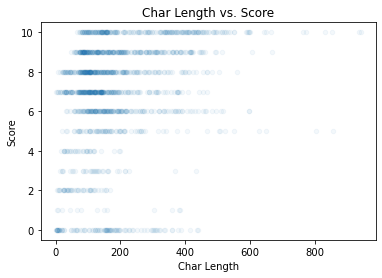

In [563]:
fig = plt.figure(figsize=(6, 4))
fig.clf()
ax = fig.gca()
df.plot(kind = 'scatter', x = 'length', y = 'score', ax = ax, alpha = 0.05)
ax.set_xlabel('Char Length')
ax.set_ylabel('Score')
ax.set_title('Char Length vs. Score')

In [564]:
from sklearn.model_selection import train_test_split
# your code here
X_train, X_test, y_train, y_test = train_test_split(np.array(df['length']).reshape(-1,1), df["score"], test_size=0.3, random_state=1)

print ("train shape", X_train.shape, y_train.shape)
print ("test shape", X_test.shape, y_test.shape)

train shape (1050, 1) (1050,)
test shape (450, 1) (450,)


In [565]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

train_score = reg.score(X_train, y_train)
test_score = reg.score(X_test, y_test)
print  ('train score =' , train_score)
print  ('test score = {}'.format(test_score))

train score = 0.0750142588037207
test score = 0.013233546425281517


In [566]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

predictions = reg.predict(X_test)
print("MSE: " +str(mean_squared_error(predictions, y_test)))
print("MAE: " +str(mean_absolute_error(predictions, y_test)))

MSE: 6.820749008542582
MAE: 2.029492690556743


## 4. Feature Engineering
Create at least 3 different features

In [567]:
liste = []
for answer in df.answer :
    liste.append(len(set(word_tokenize(answer))))

df['Number_Unique_Word'] = liste

In [568]:
occur_list = []

for row in df.iloc() :
    
    answer_split = word_tokenize(row['answer'].lower())
    question_split = []
    for w in set(word_tokenize(row['question_text'].lower())) : 
        if w not in stopwords.words('english') : 
            question_split.append(w)
            
    occur = 0    
    for s in answer_split:
        if s in question_split:
            occur +=1
    
    occur_list.append(occur)      

df['QNA_Occurences'] = occur_list

In [569]:
liste2 = []

for row in df.iloc() :
    liste = []
    for w in word_tokenize(row['answer']) :
        if w not in stopwords.words('english') :
            liste.append(w)
    liste2.append(len(set(liste)))

df['Non_Usual_Word'] = liste2

## 5. Visualize the data
Create at least 3 graphs visualizing your features with respect to the target

Text(0.5, 1.0, 'Number_Unique_Word vs. Score')

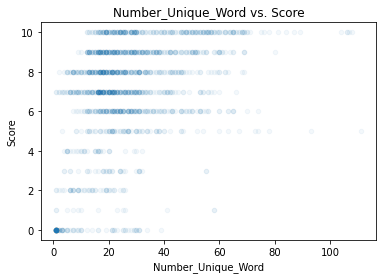

In [570]:
fig = plt.figure(figsize=(6, 4))
fig.clf()
ax = fig.gca()
df.plot(kind = 'scatter', x = 'Number_Unique_Word', y = 'score', ax = ax, alpha = 0.05)
ax.set_xlabel('Number_Unique_Word')
ax.set_ylabel('Score')
ax.set_title('Number_Unique_Word vs. Score')

Text(0.5, 1.0, 'QNA_Occurences vs. Score')

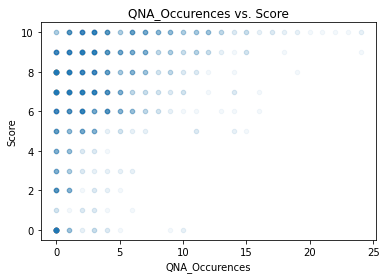

In [571]:
fig = plt.figure(figsize=(6, 4))
fig.clf()
ax = fig.gca()
df.plot(kind = 'scatter', x = 'QNA_Occurences', y = 'score', ax = ax, alpha = 0.05)
ax.set_xlabel('QNA_Occurences')
ax.set_ylabel('Score')
ax.set_title('QNA_Occurences vs. Score')

Text(0.5, 1.0, 'Non_Usual_Word vs. Score')

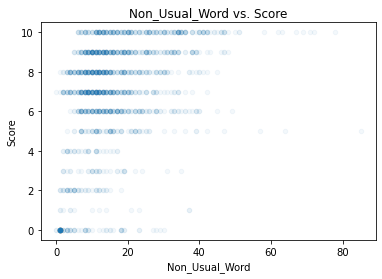

In [572]:
fig = plt.figure(figsize=(6, 4))
fig.clf()
ax = fig.gca()
df.plot(kind = 'scatter', x = 'Non_Usual_Word', y = 'score', ax = ax, alpha = 0.05)
ax.set_xlabel('Non_Usual_Word')
ax.set_ylabel('Score')
ax.set_title('Non_Usual_Word vs. Score')

## 6. Model Training
Pick a model, fit your features and print performance metrics

In [573]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV

X = df.drop(columns=["score"])
X = X.select_dtypes(exclude='object')
y = df['score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

params = {'min_samples_leaf':[2],'min_samples_split':[5],
          'n_estimators':[20]}  
clf_rf2=ExtraTreesClassifier(random_state=1)
clf_gs=GridSearchCV(clf_rf2, params, scoring = 'accuracy',cv=5)
clf_gs.fit(X_test, y_test)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(random_state=1),
             param_grid={'min_samples_leaf': [2], 'min_samples_split': [5],
                         'n_estimators': [20]},
             scoring='accuracy')

In [574]:
print ("train shape", X_train.shape, y_train.shape)
print ("test shape", X_test.shape, y_test.shape)

print('best score =' , clf_gs.best_score_)

train shape (1050, 6) (1050,)
test shape (450, 6) (450,)
best score = 0.3888888888888889


## 7. RESULT INTERPRETATION
Look at parameters, print or visualize predictions

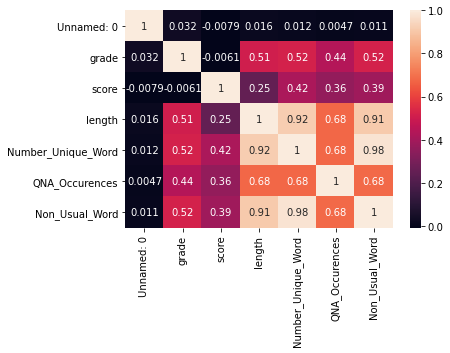

In [575]:
import seaborn as sn
sn.heatmap(df.corr(), annot=True)
plt.show()

Our first new feature is the number of unique word per answer. We can see that the score of this feature is 0.42, which is the highest score we have.
Our second new feature represents the number of important and non basic words we found in the answer AND in the question.
Our last new feature is the number of all the unique and non basic words of the answer.
With this three features, we obtain 0.3888888888888889 as the best score, that is 30 times more efficient than without them.
With others features, we will be able to obtain a better score.

## 8. Second iteration improvement


In [577]:
liste = []
for answer in df.answer :
    liste.append(len(word_tokenize(answer))/(len(sent_tokenize(answer))))

df['Average_of_Word_In_Sentence'] = liste

In [578]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV

X = df.drop(columns=["score"])
X = X.select_dtypes(exclude='object')
y = df['score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

params = {'min_samples_leaf':[2],'min_samples_split':[6],
          'n_estimators':[20]}  
clf_rf2=ExtraTreesClassifier(random_state=1)
clf_gs=GridSearchCV(clf_rf2, params, scoring = 'accuracy',cv=5)
clf_gs.fit(X_test, y_test)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(random_state=1),
             param_grid={'min_samples_leaf': [2], 'min_samples_split': [6],
                         'n_estimators': [20]},
             scoring='accuracy')

In [579]:
print ("train shape", X_train.shape, y_train.shape)
print ("test shape", X_test.shape, y_test.shape)

print('train score =' , clf_gs.best_score_)

train shape (1050, 7) (1050,)
test shape (450, 7) (450,)
train score = 0.3933333333333333
